In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autoviml.Auto_ViML import Auto_ViML
from dotenv import dotenv_values

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [2]:
config = dotenv_values('../.env')

In [3]:
data = pd.read_parquet(config["ENGINEERED_DATA"] + "train_fe.parquet")
data.drop(["customer_ID"], axis=1, inplace=True)
data.head()

,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,D_39_last,B_1_mean,B_1_std,B_1_min,B_1_max,B_1_last,B_2_mean,B_2_std,B_2_min,B_2_max,B_2_last,R_1_mean,R_1_std,R_1_min,R_1_max,R_1_last,S_3_mean,S_3_std,S_3_min,S_3_max,S_3_last,D_41_mean,D_41_std,D_41_min,D_41_max,D_41_last,B_3_mean,B_3_std,B_3_min,B_3_max,B_3_last,D_42_mean,D_42_std,D_42_min,D_42_max,D_42_last,D_43_mean,D_43_std,D_43_min,D_43_max,D_43_last,...,D_142_last,D_143_mean,D_143_std,D_143_min,D_143_max,D_143_last,D_144_mean,D_144_std,D_144_min,D_144_max,D_144_last,D_145_mean,D_145_std,D_145_min,D_145_max,D_145_last,B_30_count,B_30_last,B_30_nunique,B_38_count,B_38_last,B_38_nunique,D_114_count,D_114_last,D_114_nunique,D_116_count,D_116_last,D_116_nunique,D_117_count,D_117_last,D_117_nunique,D_120_count,D_120_last,D_120_nunique,D_126_count,D_126_last,D_126_nunique,D_63_count,D_63_last,D_63_nunique,D_64_count,D_64_last,D_64_nunique,D_66_count,D_66_last,D_66_nunique,D_68_count,D_68_last,D_68_nunique,target
0,0.93,0.02,0.87,0.96,0.93,0.23,0.83,0,3,0,0.01,0.01,0.00,0.02,0.01,1.01,0.00,1.00,1.01,1.01,0.00,0.00,0.00,0.01,0.01,0.11,0.01,0.10,0.14,0.14,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,0,0,0,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0,0,0,13,0,1,13,2,1,13,1,1,13,0,1,13,5,1,13,0,1,13,2,1,13,0,1,13,0,1,13,-1,1,13,6,1,0
1,0.90,0.02,0.86,0.93,0.88,7.15,6.74,0,19,6,0.03,0.03,0.01,0.11,0.03,0.99,0.05,0.82,1.01,1.00,0.01,0.00,0.00,0.01,0.01,0.12,0.02,0.09,0.17,0.17,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN,0.14,0.17,0.06,0.53,0.06,...,NaN,0.00,0.00,0,0,0,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0,0,0,13,0,1,13,2,1,13,1,1,13,0,1,13,0,1,13,0,2,13,2,1,13,3,1,13,0,1,13,-1,1,13,6,1,0
2,0.88,0.03,0.80,0.90,0.88,0.00,0.00,0,0,0,0.00,0.00,0.00,0.01,0.00,0.82,0.00,0.81,0.82,0.81,0.01,0.00,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,0,0,0,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0,0,0,13,0,1,13,1,1,13,1,2,13,0,1,13,0,1,13,0,1,13,2,1,13,3,1,13,2,1,13,-1,1,13,6,1,0
3,0.60,0.02,0.57,0.62,0.62,1.54,3.02,0,9,0,0.06,0.08,0.01,0.28,0.01,0.96,0.08,0.81,1.01,1.01,0.01,0.00,0.00,0.01,0.01,0.25,0.10,0.15,0.41,0.29,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN,0.06,0.04,0.01,0.15,0.05,...,NaN,0.00,0.00,0,0,0,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0,0,0,13,0,1,13,2,1,13,1,1,13,0,1,13,7,2,13,0,1,13,2,1,13,3,1,13,0,1,13,-1,1,13,3,3,0
4,0.89,0.04,0.81,0.94,0.87,0.00,0.00,0,0,0,0.01,0.00,0.00,0.01,0.01,0.81,0.00,0.81,0.82,0.82,0.00,0.00,0.00,0.01,0.00,0.17,0.00,0.17,0.18,0.18,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN,0.05,0.01,0.04,0.06,0.04,...,NaN,0.00,0.00,0,0,0,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0,0,0,13,0,1,13,1,2,13,1,1,13,0,1,13,5,1,13,0,1,13,2,1,13,3,1,13,0,1,13,1,1,13,6,1,0


In [4]:
# Manual Train Test Split
num = int(0.7*data.shape[0])
train = data[:num]
print(train.shape)
test = data[num:]
print(test.shape)

(321239, 919)
(137674, 919)


In [5]:
target = 'target'
sample_submission = ''
scoring_parameter = 'balanced-accuracy'

##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (321239, 919)
    Training Set Memory Usage = 1243.20 MB
Test Set Shape = (137674, 919)
    Test Set Memory Usage = 532.80 MB
Single_Label Target: ['target']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:  237740  ->   74.0%
           1:   83499  ->   26.0%
    Target target is already numeric. No transformation done.
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#########################################################################

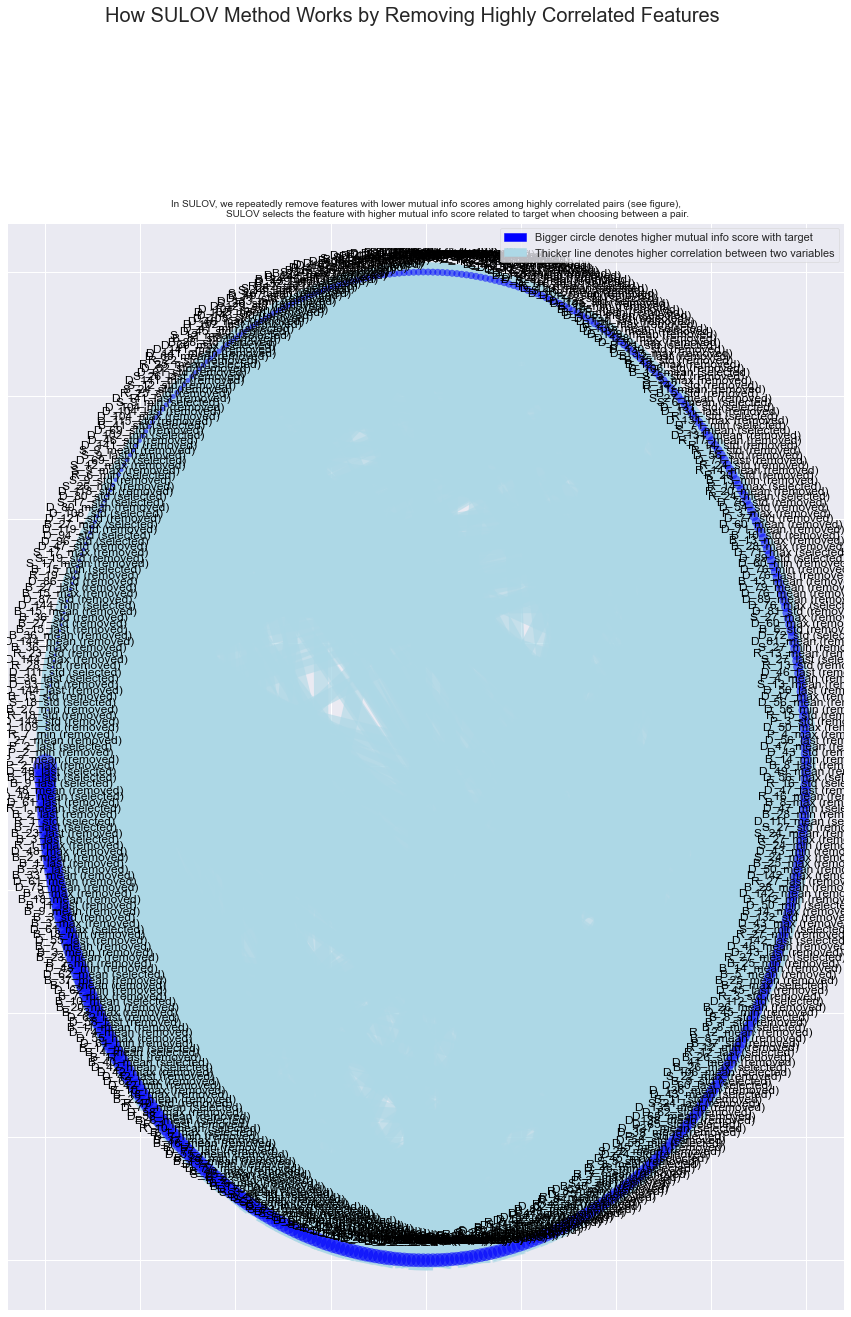

Splitting selected features into float and categorical (integer) variables:
    (230) float variables ...
    (658) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 888 
    Finding Important Features using Boosted Trees algorithm...
        using 888 variables...
        using 710 variables...
        using 532 variables...
        using 354 variables...
        using 176 variables...
Found 66 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  256991 , CV rows =  64248
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing M

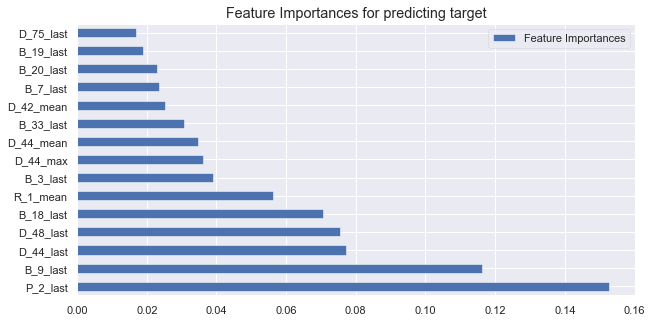

In [6]:
model, features, trainm, testm = Auto_ViML(
    train,
    target,
    test,
    sample_submission,
    hyper_param="GS",
    feature_reduction=True,
    scoring_parameter=scoring_parameter,
    KMeans_Featurizer=False,
    Boosting_Flag=False,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

In [9]:
model

RandomForestClassifier(max_depth=7, min_samples_leaf=11, n_estimators=282,
                       n_jobs=-1, oob_score=True, random_state=99,
                       warm_start=True)

In [8]:
features

['P_2_last',
 'B_33_last',
 'D_48_last',
 'R_2_last',
 'B_18_last',
 'B_9_last',
 'D_44_last',
 'B_22_last',
 'B_3_last',
 'B_30_last',
 'D_42_mean',
 'R_1_mean',
 'R_4_last',
 'D_41_last',
 'B_22_max',
 'D_39_last',
 'B_38_last',
 'D_44_mean',
 'B_7_last',
 'S_3_mean',
 'D_51_min',
 'D_51_last',
 'D_129_last',
 'D_51_max',
 'D_116_count',
 'R_2_max',
 'D_44_max',
 'R_10_max',
 'D_42_mean_Missing_Flag',
 'D_75_last',
 'D_42_min_Missing_Flag',
 'D_91_min',
 'B_20_last',
 'D_42_max_Missing_Flag',
 'R_15_max',
 'D_129_max',
 'D_127_last',
 'D_76_max_Missing_Flag',
 'D_50_std_Missing_Flag',
 'R_27_max_Missing_Flag',
 'D_76_last_Missing_Flag',
 'R_3_max',
 'D_118_std_Missing_Flag',
 'R_5_max',
 'D_123_min',
 'R_5_last',
 'D_84_last',
 'D_84_max',
 'D_50_last_Missing_Flag',
 'R_8_max',
 'D_120_last',
 'R_3_min',
 'B_19_last',
 'D_115_mean_Missing_Flag',
 'D_83_min',
 'D_129_min',
 'D_115_min_Missing_Flag',
 'S_15_max',
 'R_8_last',
 'D_78_max',
 'B_30_nunique',
 'B_33_min',
 'R_10_last',
 'D

In [10]:
trainm

,P_2_last,B_33_last,D_48_last,R_2_last,B_18_last,B_9_last,D_44_last,B_22_last,B_3_last,B_30_last,D_42_mean,R_1_mean,R_4_last,D_41_last,B_22_max,D_39_last,B_38_last,D_44_mean,B_7_last,S_3_mean,D_51_min,D_51_last,D_129_last,D_51_max,D_116_count,R_2_max,D_44_max,R_10_max,D_42_mean_Missing_Flag,D_75_last,D_42_min_Missing_Flag,D_91_min,B_20_last,D_42_max_Missing_Flag,R_15_max,D_129_max,D_127_last,D_76_max_Missing_Flag,D_50_std_Missing_Flag,R_27_max_Missing_Flag,D_76_last_Missing_Flag,R_3_max,D_118_std_Missing_Flag,R_5_max,D_123_min,R_5_last,D_84_last,D_84_max,D_50_last_Missing_Flag,R_8_max,D_120_last,R_3_min,B_19_last,D_115_mean_Missing_Flag,D_83_min,D_129_min,D_115_min_Missing_Flag,S_15_max,R_8_last,D_78_max,B_30_nunique,B_33_min,R_10_last,D_81_last,D_78_last,R_26_max,target
0,0.93,1,0.19,0,1.00,0.01,0,0,0.01,0,-1.00,0.00,0,0.00,0,0,2,0.00,0.06,0.11,2,2,1,4,13,0,0,0,1,0,1,2,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6,0,0,1,1,0,0,0,-1,0
1,0.88,1,0.01,0,1.00,0.01,0,0,0.01,0,-1.00,0.01,0,0.00,0,6,2,0.00,0.03,0.12,1,1,0,2,13,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,0,0,1,1,0,0,0,-1,0
2,0.88,1,0.08,0,1.00,0.01,0,0,0.01,0,-1.00,0.01,0,0.00,0,0,1,0.08,0.03,-1.29,0,1,0,1,13,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,0,0,1,1,0,0,0,-1,0
3,0.62,1,0.01,0,1.00,0.02,0,0,0.01,0,-1.00,0.01,0,0.00,0,0,2,0.00,0.01,0.25,0,1,1,1,13,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8,0,0,1,1,0,0,0,-1,0
4,0.87,1,0.33,0,0.53,0.00,0,0,0.01,0,-1.00,0.00,0,0.00,0,0,1,0.00,0.16,0.17,0,0,1,1,13,0,0,0,1,2,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8,0,0,1,1,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321234,0.86,1,0.13,0,0.69,0.00,0,0,0.01,0,-1.00,0.00,0,0.00,0,0,2,0.00,0.06,0.27,0,0,0,0,13,0,0,0,1,3,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,0,0,1,1,0,0,0,-1,0
321235,0.53,1,0.73,0,0.40,0.01,2,0,0.00,0,-1.00,0.00,0,0.00,0,0,1,1.00,1.04,-1.29,0,0,0,0,13,0,2,0,1,4,1,0,0,1,0,0,0,1,1,0,1,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,8,0,0,1,1,0,0,0,-1,0
321236,0.52,0,0.30,0,0.06,0.46,1,0,0.25,0,-1.00,0.01,0,1.00,0,32,3,4.23,0.26,0.11,1,1,0,1,13,0,6,0,1,5,1,0,17,1,0,0,0,1,1,0,1,4,0,0,0,0,0,0,1,0,0,0,8,0,0,0,0,6,0,0,2,0,0,0,0,-1,0
321237,0.59,0,0.57,0,0.10,0.67,1,0,0.11,0,-1.00,0.12,0,0.57,0,31,3,1.92,0.19,0.18,0,0,1,0,13,1,4,1,1,15,1,0,8,1,0,1,0,1,0,0,1,5,0,3,0,0,0,1,0,2,1,0,0,0,0,-1,0,14,0,1,1,0,0,0,0,-1,0


In [11]:
testm

,P_2_last,B_33_last,D_48_last,R_2_last,B_18_last,B_9_last,D_44_last,B_22_last,B_3_last,B_30_last,D_42_mean,R_1_mean,R_4_last,D_41_last,B_22_max,D_39_last,B_38_last,D_44_mean,B_7_last,S_3_mean,D_51_min,D_51_last,D_129_last,D_51_max,D_116_count,R_2_max,D_44_max,R_10_max,D_42_mean_Missing_Flag,D_75_last,D_42_min_Missing_Flag,D_91_min,B_20_last,D_42_max_Missing_Flag,R_15_max,D_129_max,D_127_last,D_76_max_Missing_Flag,D_50_std_Missing_Flag,R_27_max_Missing_Flag,D_76_last_Missing_Flag,R_3_max,D_118_std_Missing_Flag,R_5_max,D_123_min,R_5_last,D_84_last,D_84_max,D_50_last_Missing_Flag,R_8_max,D_120_last,R_3_min,B_19_last,D_115_mean_Missing_Flag,D_83_min,D_129_min,D_115_min_Missing_Flag,S_15_max,R_8_last,D_78_max,B_30_nunique,B_33_min,R_10_last,D_81_last,D_78_last,R_26_max,target_proba_0,target_proba_1,target_predictions,target_Linear_Discriminant_predictions,target_Linear_SVC_predictions,target_Naive_Bayes_predictions,target_One_vs_Rest_Classifier_predictions,target_Forests_predictions,target_Ensembled_predictions
321239,0.80,1.00,0.10,0.00,1.00,0.00,0.03,0.14,0.39,0.33,0.00,0.00,0.00,0.10,0.14,0.01,0.38,0.02,0.30,0.25,0.14,0.29,0.50,0.25,1.00,0.00,0.02,0.00,1.00,0.00,1.00,0.17,0.06,1.00,0.00,0.50,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.50,0.00,0.02,0.02,1.00,0.00,0.50,0.00,0.01,0.00,0.07,0.50,0.00,0.11,0.00,0.03,0.00,1.00,0.00,0.11,0.04,0.00,0.97,0.03,0.00,0,0,0,0,0.00,0
321240,1.00,1.00,0.10,0.00,1.00,0.01,0.03,0.14,0.39,0.33,0.00,0.00,0.00,0.10,0.14,0.09,0.38,0.02,0.31,0.27,0.29,0.29,1.00,0.25,1.00,0.00,0.02,0.00,1.00,0.00,1.00,0.17,0.06,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.02,0.02,0.00,0.00,0.50,0.00,0.01,0.00,0.07,0.00,0.00,0.09,0.00,0.03,0.00,1.00,0.00,0.11,0.04,0.00,0.99,0.01,0.00,0,0,1,0,0.00,0
321241,0.87,1.00,0.13,0.00,0.69,0.00,0.03,0.14,0.39,0.33,0.00,0.00,0.00,0.10,0.14,0.00,0.38,0.02,0.32,0.28,0.00,0.14,0.50,0.12,1.00,0.00,0.02,0.00,1.00,0.02,1.00,0.17,0.06,1.00,0.00,0.50,0.00,1.00,1.00,0.00,1.00,0.03,0.00,0.00,0.50,0.00,0.02,0.02,1.00,0.00,0.50,0.00,0.01,0.00,0.07,0.50,0.00,0.14,0.00,0.03,0.00,1.00,0.00,0.11,0.04,0.00,0.99,0.01,0.00,0,0,0,0,0.00,0
321242,0.78,0.50,0.20,0.00,0.15,0.02,0.18,0.43,0.67,0.67,0.23,0.07,0.00,0.10,0.43,0.00,0.75,0.12,0.74,0.33,0.00,0.00,0.50,0.00,1.00,0.00,0.13,0.05,0.00,0.13,0.00,0.17,0.89,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.15,0.00,0.00,0.50,0.00,0.02,0.02,0.00,0.00,0.50,0.04,1.00,0.00,0.07,0.50,0.00,0.20,0.00,0.09,0.67,0.50,0.07,0.11,0.12,0.03,0.22,0.78,1.00,0,0,0,0,1.00,0
321243,0.98,1.00,0.11,0.00,1.00,0.00,0.03,0.14,0.39,0.33,0.00,0.00,0.00,0.10,0.14,0.00,0.38,0.02,0.31,0.26,0.00,0.00,0.50,0.12,1.00,0.00,0.02,0.00,1.00,0.00,1.00,0.17,0.06,1.00,0.00,0.50,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.50,0.00,0.02,0.02,1.00,0.00,0.50,0.00,0.01,0.00,0.07,0.50,0.00,0.11,0.00,0.03,0.00,1.00,0.00,0.11,0.04,0.00,0.99,0.01,0.00,0,0,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,0.93,1.00,0.11,0.00,1.00,0.01,0.03,0.14,0.39,0.33,0.00,0.00,0.00,0.10,0.14,0.09,0.38,0.02,0.31,0.28,0.00,0.29,0.50,0.25,1.00,0.00,0.02,0.00,1.00,0.00,1.00,0.17,0.06,1.00,0.00,0.50,0.00,1.00,1.00,0.00,1.00,0.06,0.00,0.00,0.50,0.00,0.02,0.02,1.00,0.00,1.00,0.00,0.01,0.00,0.07,0.50,0.00,0.12,0.00,0.03,0.00,1.00,0.00,0.11,0.04,0.00,0.99,0.01,0.00,0,0,0,0,0.00,0
458909,0.93,0.50,0.12,0.00,0.10,0.01,0.06,0.14,0.47,0.33,0.00,0.00,0.00,0.10,0.29,0.01,1.00,0.05,0.45,0.30,0.00,0.14,0.50,0.25,1.00,0.00,0.04,0.00,1.00,0.08,1.00,0.17,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.01,0.00,0.00,0.50,0.00,0.02,0.02,0.00,0.00,0.50,0.00,0.75,0.00,0.07,0.50,0.00,0.14,0.00,0.03,0.33,0.50,0.00,0.11,0.04,0.00,0.83,0.17,0.00,0,0,0,0,0.00,0
458910,0.92,1.00,0.11,0.00,1.00,0.00,0.03,0.14,0.39,0.33,0.00,0.00,0.00,0.10,0.14,0.05,0.50,0.02,0.32,0.2